![](brain.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plot

# Descente de gradient

## Mise en situation
Je travaille pour un site immobilier entre particuliers. Je souhaite fournir aux vendeurs une estimation raisonnable du prix de vente de manière automatisée.

Je dispose pour celà des données des dernières ventes, avec énormément de critères - probablement pas tous utiles...

Je n'arrive pas à mettre en place une régression linéaire : les milliers d'informations par bien vendu (sans parler de la montée de degré pour une régression polynomiale...) me donnent une matrice beaucoup trop grosse et trop longue à inverser :(

## La descente de gradient
### Le but de la méthode
Il est important de bien comprendre le problème ici. Toute la logique mathématique reste inchangée, il s'agit toujours de minimiser la fonction de coût par rapport aux paramètres du modèle.

Simplement, il faut trouver une autre méthode de minimisation. La résolution directe n'étant pas possible, il va falloir trouver un moyen de s'approcher du minimum, de manière rapide et précise de préférence. Et cette manière, c'est la descente de gradient.

### Visualisation 2D
Pour mieux voir de quoi il retourne, un petit exemple visuel

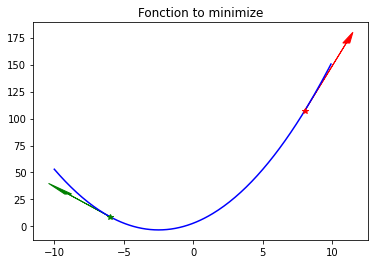

In [2]:
# Une fonction, et sa dérivée
def f(X) : return X**2 + 5*X + 3
def df(X) : return 2*X + 5

def tangent(X, style):
    slope = df(X)
    dX = 3
    if slope <0: dX = -3
    plot.arrow(X, f(X), dX, dX*slope, head_width = .5, head_length=10,color=style)

x = np.arange(-10, 10, 0.1)
plot.figure()
plot.plot(x, f(x), "b-")
plot.axis('on')
plot.title('Fonction to minimize')

plot.plot(8, f(8), "r*")
tangent(8, "r")

plot.plot(-6, f(-6), "g*")
tangent(-6, "g")

Je souhaite donc minimiser ma fonction (courbe bleue). Je pars d'un point au hasard sur cette courbe, il n'est probablement pas le minimum (étoile rouge).

De là, je vais calculer la dérivée de ma fonction, et tracer la demi-tangente (en rouge). Ce "vecteur" rouge est le gradient de ma fonction : vers quelle direction ma fonction augmente.

En vert, un autre exemple, négatif cette fois.

Puisque le gradient m'indique dans quelle sens la fonction augmente, partir à contre courant de ce gradient devrait me rapprocher du minimum. Partant de là, on peut définir un processus itératif.

```
X = point au hasard
Répéter:
    dX = dérivée de f, en X
    X = X - alpha * dX
```

Notons l'introduction de alpha : le _learning rate_, ou taux d'apprentissage. On y reviendra rapidement, c'est un réel, on prendra 0.1 pour l'instant

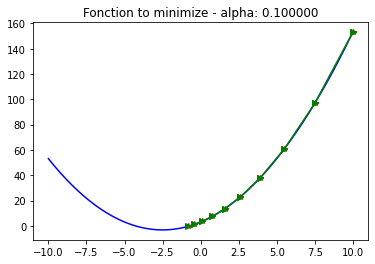

In [3]:
def plot_figure(start_at, alpha):
    x = np.arange(-10, 10, 0.1)
    plot.plot(x, f(x), "b-")
    plot.axis('on')
    plot.title('Fonction to minimize - alpha: %f'%(alpha))

    X = start_at
    X_prev = start_at
    for i in range(10):
        plot.plot(X, f(X), "r*")
        plot.plot([X_prev, X],[f(X_prev), f(X)], "g->")
        X_prev = X
        X -= df(X) * alpha

plot_figure(10, 0.1)

Comme on peut le voir, avec alpha = 0.1, et en partant de X = 10, on progresse étape par étape vers le minimum

### Le choix de $\alpha$

Voici quelques figures qui montrent l'impact de $\alpha$ sur cette méthode

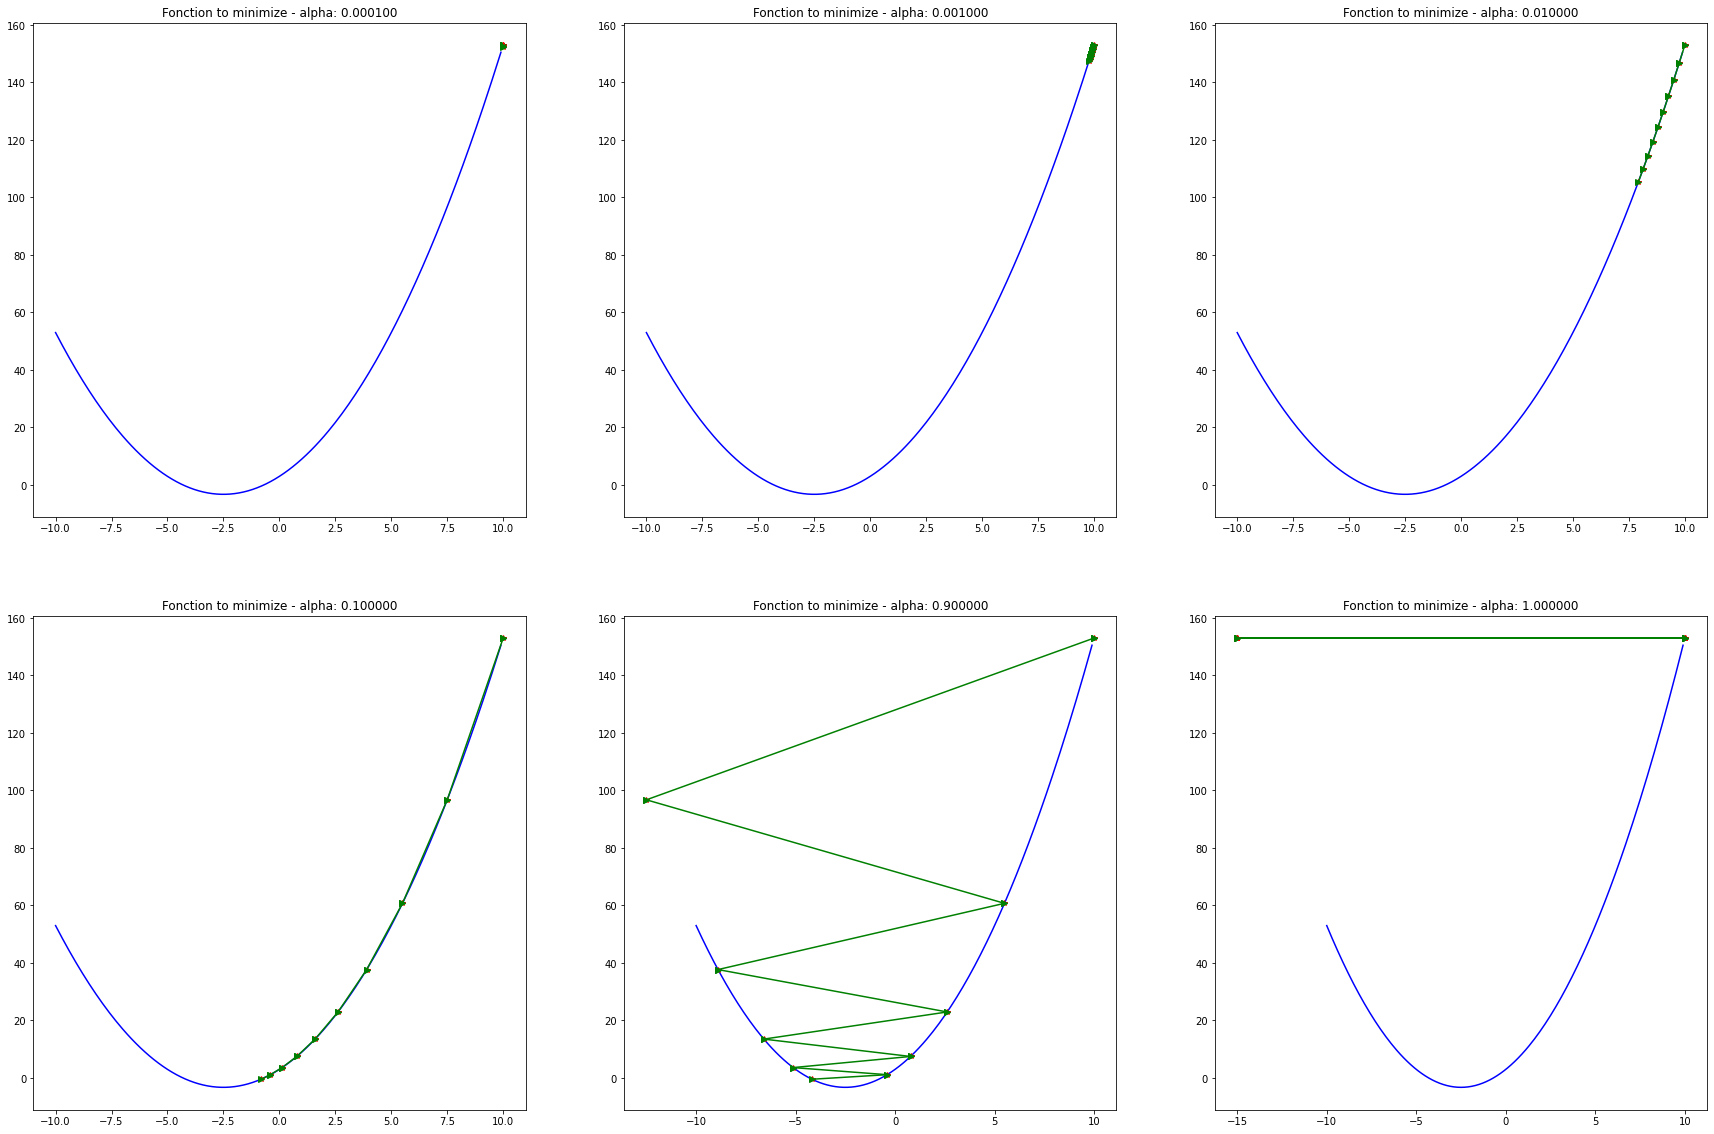

In [4]:
fig = plot.figure(figsize=(30,20))
i = 1
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.9, 1]:
    plot.subplot(2, 3, i)
    plot_figure(10, alpha)
    i+=1

On constate que suivant les valeurs de $\alpha$, le résultat varie beaucoup : si $\alpha$ est trop petit, la convergence est beaucoup trop lente. A l'inverse s'il est trop élevé, la descente va osciller autour du point cherché avec des larges amplitudes, voire même diverger !

### Application au problème
Pour revenir à notre problème : on cherche le $\theta$ qui minimise la fonction de coût $J$. On peut appliquer cette méthode à notre cas :

```
theta = valeurs au hasard
répéter un certain nombre de fois:
    gradient = dérivée de J par rapport à theta
    theta = theta - alpha * gradient
```

Et pour rappel, depuis le 1er jour, on a déjà la formule du gradient : 

$\frac{dJ}{d\theta} = \frac{1}{m} X^T.(X.\theta - Y)$

## Simulation rapide
Validons le concept avec une petite descente de gradient sur une fonction qu'on souhaite modéliser

In [5]:
# Trouve le meilleur modèle par rapport à X et Y
def solve_model(X, Y, alpha = 0.01, iterations = 1000) : 
    
    m = X.shape[0]
    
    # On commence par ajouter une colonne x0 = 1
    Xtmp = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
    
    # On initialise theta
    theta = np.random.rand(Xtmp.shape[1], 1) * 0.01

    # Puis on calcule theta
    for i in range(iterations):
        grad = np.dot(Xtmp.T, np.dot(Xtmp, theta) - Y) / m
        theta -= alpha * grad
    
    return theta


num_training_samples = 1000


# Données et fonction fictives : pour a,b,c donnés, on calcule souhaite calculer f(a,b,c) = 10 + 3a + 2b + 5c
# on charche 1000 exemples a,b,c, et le résultat correspondant
X_demo = np.random.rand(num_training_samples, 3)
Y_demo = 10 + np.dot(X_demo, np.array([3,2,5]).reshape(3,1))

print("Exemple 1: a=%i, b=%i, c=%i, f(a,b,c)=%i" % (X_demo[0,0],X_demo[0,1],X_demo[0,2],Y_demo[0]))

# Theta vaut normalement 10,3,2,5 puisque ce sont les coeffcients de la fonction qu'on a choisi
for it in [100, 1000, 10000, 100000]:
    theta_demo = solve_model(X_demo, Y_demo, alpha = 0.01, iterations = it)
    print("After %i iterations : theta = %s -- expected: exactly 10, 3, 2, 5" %(it, str(np.round(theta_demo[:,0], 3))))


Exemple 1: a=0, b=0, c=0, f(a,b,c)=14
After 100 iterations : theta = [7.068 3.565 3.467 3.708] -- expected: exactly 10, 3, 2, 5
After 1000 iterations : theta = [9.024 3.775 3.188 4.914] -- expected: exactly 10, 3, 2, 5
After 10000 iterations : theta = [9.988 3.008 2.007 5.008] -- expected: exactly 10, 3, 2, 5
After 100000 iterations : theta = [10.  3.  2.  5.] -- expected: exactly 10, 3, 2, 5


On remarque qu'on finit bien par se rapprocher de l'objectif, même si c'est un peu long.
* En augmentant alpha, on pourra faire plus rapide, ou diverger
* Sous réserve d'avoir un alpha valide, en augmentant le nombre d'itérations, on peut améliorer la précision

## Retour à la mise en situation
On va résoudre notre problème à l'aide de cette méthode
### Chargement des données


In [6]:
data = np.load('data/d03_data.npy')
# chargement de X (toutes les colonnes sauf la dernière) et de Y (dernière colonne)
Xtrain = data[:,0:-1]
Ytrain = data[:,-1].reshape(-1,1)

In [7]:
theta = solve_model(Xtrain, Ytrain, alpha = 0.005, iterations = 10000)

def cost(X, Y, model):
    m = X.shape[0]
    return np.sum((np.dot(X, model)-Y)**2)/2/m

print("Cost after training : %f" % (cost(np.concatenate([np.ones((Xtrain.shape[0], 1)), Xtrain], axis=1), Ytrain, theta)))

Cost after training : 0.101473


### Courbe d'apprentissge

Afin de visualiser l'impact du nombre d'itérations, on va tracer la _courbe d'apprentissage_ : l'évolution du coût en fonction du nombre d'itérations

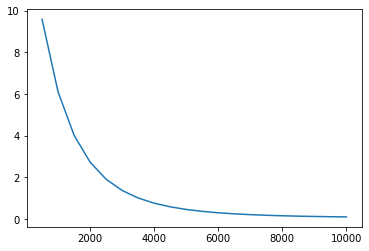

In [8]:
#Tracé de la courbe d'apprentissage
def solve_model_with_curve(X, Y, alpha = 0.01, iterations = 1000, step = 100) : 
    
    m = X.shape[0]
    
    # On commence par ajouter une colonne x0 = 1
    Xtmp = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
    
    # On initialise theta
    theta = np.random.rand(Xtmp.shape[1], 1)

    p_x = []
    p_y = []
    
    # Puis on calcule theta
    for i in range(1,iterations+1):
        grad = np.dot(Xtmp.T, np.dot(Xtmp, theta) - Y) / m
        theta -= alpha * grad
        if i % step == 0:
            p_x.append(i)
            p_y.append(cost(Xtmp, Y, theta))
    plot.plot(p_x, p_y)
    return theta

theta = solve_model_with_curve(Xtrain, Ytrain, alpha = 0.005, iterations = 10000, step = 500)

On remarque que le coût décroit à chaque itération : c'est le but recherché, puisqu'on minimise le coût et que le gradient est là pour nous indiquer la bonne direction

### Analyse de la courbe d'apprentissage
Pour être sur que l'apprentissage se déroule bien (essentiellement ici, s'assurer que $\alpha$ n'est pas trop grand, il est souvent intéressant d'analyser la courbe d'apprentissage justement.

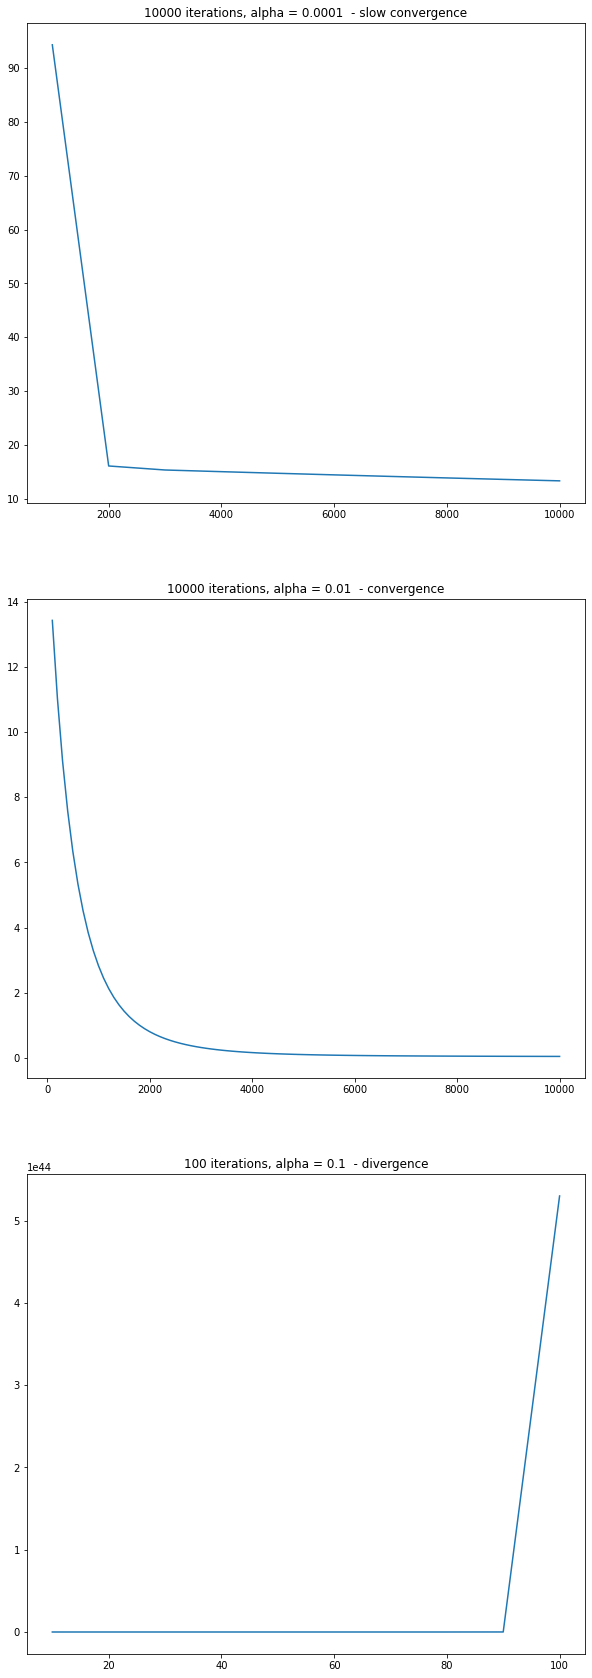

In [9]:
plot.figure(figsize=(10,30))

plot.subplot(3,1,1)
plot.title('10000 iterations, alpha = 0.0001  - slow convergence')
theta = solve_model_with_curve(Xtrain, Ytrain, alpha = 0.0001, iterations = 10000, step = 1000)

plot.subplot(3,1,2)
plot.title('10000 iterations, alpha = 0.01  - convergence')
theta = solve_model_with_curve(Xtrain, Ytrain, alpha = 0.01, iterations = 10000, step = 100)

plot.subplot(3,1,3)
plot.title('100 iterations, alpha = 0.1  - divergence')
theta = solve_model_with_curve(Xtrain, Ytrain, alpha = 0.1, iterations = 100, step = 10)

* La 1ere courbe indique ce qui arrive avec un $\alpha$ trop petit. Ca converge, mais c'est très lent. Par contre, la courbe a quand même une bonne tête et on finira par converger
* La 2nde courbe présente l'apprentissage avec un "bon" $\alpha$ : la courbe décroit et se rapproche de zéro : le modèle est de plus en plus précis
* La dernière courbe est le cas d'un $\alpha$ beaucoup trop grand : le modèle diverge.

### Paramètre vs hyperparamètre

Un paramètre du modèle est une des composantes qu'on fait varier pour minimiser la fonction de coût. Ex: $\theta$

Un hyperparamètre du modèle est une valeur qu'on peut faire varier pour optimiser l'apprentissage. Ex: $\alpha$

Un "mauvais" modèle est un modèle qui ne représentera jamais la fonction qu'on recherche. Exemple : essayer de modéliser une parabole avec une droite.
Mais même pour un mauvais modèle, la fonction de coût admet un minimum et la descente de gradient doit y mener.

Pour résumer :
* si le modèle ne converge pas vers un minimum, c'est probablement la faute de $\alpha$, qu'il faut faire varier
* sinon, le modèle converge forcément vers une valeur (qu'on définira plus tard comme le _biais_ du modèle):
  * si cette valeur est proche de zéro, le modèle est probablement bon, en tous les cas il a trouvé ce qu'on lui demandait - mais était-ce la bonne chose à demander ? :-)
  * sinon, il faut changer de modèle, celui-ci ne trouvera probablement jamais la bonne représentation de la fonction recherchée